In [14]:
from pathlib import Path
import pandas as pd
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import numpy as np

Spróbujmy pobawić się Daskiem w osobnym notatniku.

In [5]:
DATA_FOLDER = Path('data')
SHP_FOLDER = DATA_FOLDER / 'taxi_zones'

In [6]:
zones = pd.read_csv(DATA_FOLDER / 'taxi+_zone_lookup.csv')
yellow_zones = zones.loc[zones['service_zone'] == 'Yellow Zone', 'LocationID']

In [7]:
ddf = dd.read_csv(DATA_FOLDER / 'yellow_tripdata_*.csv', include_path_column=True, parse_dates=[1, 2], 
                  dtype={'store_and_fwd_flag': 'category',
                         'RatecodeID': 'float64',
                         'VendorID': 'float64', 
                         'passenger_count': 'float64',
                         'payment_type': 'float64',
                         'tolls_amount': 'float64'})

In [8]:
with ProgressBar():
    display(ddf.head())

[########################################] | 100% Completed |  3.7s


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1       1.0  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2       1.0  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3       1.0  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4       2.0  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           1.0          6.0    3.0      0.5        1.47           0.0   
1           1.0          7.0    3.0      0.5        1.50           0.0   
2           1.0          6.0    3.0      0.5        1.00           0.0   
3           1.0          5.5    0.5      0.5        1.36           0.0   
4           2.0          3.5    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    0.3         11.27                   2.5   
1                    0.3         12.30                   2.5   
2                    0.3         10.80                   2.5   
3                    0.3          8.16                   0.0   
4                    0.3          4.80                   0.0   

                                                path  
0  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
1  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
2  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
3  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
4  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...

In [9]:
with ProgressBar():
    display(ddf.tail())

[########################################] | 100% Completed |  3.8s


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
708738       NaN  2021-07-09 18:07:09   2021-07-09 18:27:04              NaN   
708739       NaN  2021-07-09 18:16:00   2021-07-09 18:57:00              NaN   
708740       NaN  2021-07-09 18:07:46   2021-07-09 19:07:06              NaN   
708741       NaN  2021-07-09 18:17:00   2021-07-09 18:42:00              NaN   
708742       NaN  2021-07-09 18:11:00   2021-07-09 18:30:00              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
708738           2.60         NaN                NaN            68   
708739          12.47         NaN                NaN            92   
708740           3.01         NaN                NaN           265   
708741           6.67         NaN                NaN           262   
708742           3.51         NaN                NaN           232   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
708738           144           NaN        14.00   1.00      0.5        2.75   
708739           144           NaN        47.08   2.75      0.5        0.00   
708740           249           NaN        23.96   0.00      0.5        0.00   
708741           211           NaN        24.24   0.00      0.5        5.96   
708742            68           NaN        15.27   0.00      0.5        3.96   

        tolls_amount  improvement_surcharge  total_amount  \
708738           0.0                    0.3         21.05   
708739           0.0                    0.3         50.63   
708740           0.0                    0.3         24.76   
708741           0.0                    0.3         33.50   
708742           0.0                    0.3         22.53   

        congestion_surcharge  \
708738                   2.5   
708739                   0.0   
708740                   0.0   
708741                   2.5   
708742                   2.5   

                                                     path  
708738  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
708739  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
708740  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
708741  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
708742  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...

In [10]:
with ProgressBar():
    display(ddf.info())

<class 'dask.dataframe.core.DataFrame'>
Columns: 19 entries, VendorID to path
dtypes: category(1), category(1), datetime64[ns](2), float64(13), int64(2)

None

In [11]:
with ProgressBar():
    display(ddf.shape[0].compute())

[########################################] | 100% Completed |  2min  1.6s


39649199

39,6 G rekordów

In [12]:
with ProgressBar():
    print(ddf.isnull().sum().compute())

[########################################] | 100% Completed |  2min  6.5s
VendorID                 1643596
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1643596
trip_distance                  0
RatecodeID               1643596
store_and_fwd_flag       1643596
PULocationID                   0
DOLocationID                   0
payment_type             1643596
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
path                           0
dtype: int64


Zobaczmy czy tym razem się wysypie - spróbujemy robić operacje po kolei (prawdopodnie uskuteczniam właśnie jakiś antypattern - właściwie nawet tak w dokumentacji napisali, żeby nie robić operacji pojedynczo).

Usuńmy NaNy.

In [13]:
with ProgressBar():
    ddf = ddf.dropna()
    ddf.compute()

[########################################] | 100% Completed |  2min 10.3s


Odfiltrujmy tylko interesujące nas `PULocationID`.

In [15]:
with ProgressBar():
    ddf = ddf[ddf['PULocationID'].isin(yellow_zones)]
    ddf.compute()

[########################################] | 100% Completed |  2min 19.2s


Usuńmy na postawie kolumny `VendorID` rekordy z wartościami różnymi od `1` i `2` (takie jak w słowniku danych).

In [16]:
with ProgressBar():
    ddf = ddf[ddf['VendorID'].isin(np.array([1, 2]))]
    ddf.compute()

[########################################] | 100% Completed |  2min 27.9s


Usuńmy na podstawie kolumny `RatecodeID` rekordy z wartościami poza zakresem 1-6 (taki jak w słowniku danych).

In [17]:
with ProgressBar():
    ddf = ddf[ddf['RatecodeID'].isin(np.arange(1, 7))]
    ddf.compute()

[########################################] | 100% Completed |  2min 42.4s


Usuńmy na podstawie kolumny `payment_type` rekordy o wartościach `3` (`No charge`), `4` (`Dispute`), `6` (`Voided trip`) (innymi słowy zostawiamy wartości `1`, `2`, i `5`).

In [18]:
with ProgressBar():
    ddf = ddf[ddf['payment_type'].isin(np.array([1, 2, 5]))]
    ddf.compute()

[########################################] | 100% Completed |  2min 47.7s


Usuńmy na podstawie kolumny `store_and_fwd_flag` rekordy z wartościami innymi niż `N` lub `Y` (takie jak w słowniku danych).

In [19]:
with ProgressBar():
    ddf = ddf[ddf['store_and_fwd_flag'].isin(['Y', 'N'])]
    ddf.compute()

[########################################] | 100% Completed |  2min 56.2s


Usuńmy rekordy z wartościami mniejszymi-równymi `0` dla kolumn dla których nie ma to sensu:
   1. ilości pasażerów `passenger_count`
   1. długości podróży `trip_distance`
   1. oplacie naliczonej przez taksometr `fare_amount`
   1. całkowitej kwocie do zapłacenia `total_amount`

In [20]:
with ProgressBar():
    ddf = ddf[ddf[['passenger_count', 'trip_distance', 'fare_amount', 'total_amount']].gt(0).all(axis=1)]
    ddf.compute()

[########################################] | 100% Completed |  3min 10.5s


Usuwała rekordy z wartościami mniejszymi od `0` dla kolumn dla których nie ma to sensu:
   1. dodatkowe nałożone opłaty `extra`
   1. podatek MTA `mta_tax`
   1. kwota napiwku `tip_amount`
   1. kwota opłat drogowych `tolls_amount`
   1. dodatkowa opłata `improvement_surcharge`
   1. opłata "korkowa" `congestion_surcharge`

In [21]:
with ProgressBar():
    ddf = ddf[ddf[['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                'improvement_surcharge', 'congestion_surcharge']].ge(0).all(axis=1)]
    ddf.compute()

[########################################] | 100% Completed |  3min 20.8s


Usuńmy rekordy gdzie `tpep_dropoff_datetime` <= `tpep_pickup_datetime`.

In [23]:
with ProgressBar():
    ddf = ddf[ddf['tpep_dropoff_datetime'] > ddf['tpep_pickup_datetime']]
    ddf.compute()

[########################################] | 100% Completed |  4min  1.8s


Usuńmy zduplikowane rekordy.

In [24]:
with ProgressBar():
    ddf = ddf.drop_duplicates()
    ddf.compute()

[########################################] | 100% Completed |  6min 10.7s


Sprawdźmy ile rekordów zostało.

In [25]:
with ProgressBar():
    display(ddf.shape[0].compute())

[########################################] | 100% Completed |  6min 13.0s


32601740

32,6 G rekordów

In [27]:
100 - 32.6 / 39.6 * 100

17.676767676767682

17,6% rekordów mniej

In [29]:
with ProgressBar():
    display(ddf.head())

[########################################] | 100% Completed |  6min 17.6s


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1       1.0  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2       1.0  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3       1.0  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
9       1.0  2020-01-01 00:29:01   2020-01-01 00:40:28              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
9            0.7         1.0                  N           246            48   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           1.0          6.0    3.0      0.5        1.47           0.0   
1           1.0          7.0    3.0      0.5        1.50           0.0   
2           1.0          6.0    3.0      0.5        1.00           0.0   
3           1.0          5.5    0.5      0.5        1.36           0.0   
9           1.0          8.0    3.0      0.5        2.35           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    0.3         11.27                   2.5   
1                    0.3         12.30                   2.5   
2                    0.3         10.80                   2.5   
3                    0.3          8.16                   0.0   
9                    0.3         14.15                   2.5   

                                                path  
0  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
1  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
2  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
3  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
9  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...

In [30]:
with ProgressBar():
    display(ddf.tail())

[########################################] | 100% Completed |  6min 16.1s


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
578082       1.0  2021-07-31 23:42:13   2021-07-31 23:55:51              4.0   
578083       2.0  2021-07-31 23:24:08   2021-07-31 23:44:33              4.0   
578084       2.0  2021-07-31 23:09:36   2021-07-31 23:18:54              1.0   
578085       2.0  2021-07-31 23:20:20   2021-07-31 23:38:19              1.0   
578086       2.0  2021-07-31 23:45:48   2021-08-01 00:03:05              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
578082           3.50         1.0                  N           263   
578083           3.64         1.0                  N           144   
578084           3.04         1.0                  N            87   
578085           2.95         1.0                  N             4   
578086           1.64         1.0                  N           100   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
578082           234           2.0         13.0    3.0      0.5        0.00   
578083           246           1.0         15.5    0.5      0.5        3.86   
578084             4           1.0         10.5    0.5      0.5        1.80   
578085           246           1.0         14.0    0.5      0.5        3.56   
578086           233           1.0         12.0    0.5      0.5        3.16   

        tolls_amount  improvement_surcharge  total_amount  \
578082           0.0                    0.3         16.80   
578083           0.0                    0.3         23.16   
578084           0.0                    0.3         16.10   
578085           0.0                    0.3         21.36   
578086           0.0                    0.3         18.96   

        congestion_surcharge  \
578082                   2.5   
578083                   2.5   
578084                   2.5   
578085                   2.5   
578086                   2.5   

                                                     path  
578082  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
578083  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
578084  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
578085  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
578086  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...

Zajężło to dużo dłużej niż poprzednio, zgaduję, ze przesortował dane, ale niew iem dlaczego wtedy `tail()` też zajął tak długo.

To czego jeszcze nie zrobiliśmy, w porównaniu do naszego ograniczonego datasetu z poprzedniego notebooka, to usunięcie rekordów, które mają czasy nienależące do teoretycznego zakresu wyznaczonego przez nazwę pliku. W celu ich odfiltrowania zachowałem ścieżkę pliku w kolumnie `path` (żeby przerobić to na rok i miesiąc i potem po tym odfiltrować rekordy poszczególnych plików), ale ponieważ jezęli chodzi o Daska to trochę

![](https://whatevertrevorr.files.wordpress.com/2015/02/i-have-no-idea-what-im-doing-dog.jpg)

więc odfiltrujemy w bardzo prymitywny sposób rekordy wystające poza cały zakres dat (chociaż sądząc po `head()` i `tail()` trochę wygląda na to, że dane są już prawdopodobnie posortowane i nie ma w nich rekordów nie wchodzących w interesujący nas zakres.

Dla formalności:

In [31]:
from datetime import datetime

In [32]:
start_date, end_date = datetime(2020, 1, 1), datetime(2021, 8, 1)

In [34]:
with ProgressBar():
    ddf = ddf[(ddf['tpep_pickup_datetime'] >= start_date) & (ddf['tpep_pickup_datetime'] < end_date)]
    ddf.compute()

[########################################] | 100% Completed |  6min 14.4s


In [35]:
with ProgressBar():
    ddf = ddf[(ddf['tpep_dropoff_datetime'] >= start_date) & (ddf['tpep_dropoff_datetime'] < end_date.replace(day=2))]
    ddf.compute()

[########################################] | 100% Completed |  6min 27.6s


Trochę kończy mi się czas to nawet nie odpalam liczenia rekordów.

Ponieważ to wszystko trwa tak długo to najpierw ustalę najpopularniejszą strefę początkową, a dopiero potem spróbuję przyjrzeć się rozkładowi np. czasów przejazdów, żeby ew. wyeliminować outliery (przy czym to nei są oultiery w sensie szeregu czasowego - outliery do wyeliminowania przed modelowaniem Porphetem to piki w górę/dół w samym szeregu; teraz po prostu czyścimy dane jeszcze przed traktowaniem ich jak szereg czasowy).

In [36]:
with ProgressBar():
    ddf['PULocationID'].value_counts().compute().plot(kind='bar')

[########################################] | 100% Completed |  6min 21.5s


Ech, zapomniałem ustawić rozmiaru i seaborne'a.

In [37]:
import seaborn as sns

In [38]:
sns.set(rc={'figure.figsize':(15, 5)})

w każdym razie dalej najbardziej popularną strefą jest `237`, ogranczmy sobie nasz dataset właśnie do niej.

In [41]:
with ProgressBar():
    ddf_237 = ddf.loc[ddf['PULocationID'] == 237]
    ddf_237.compute()

[########################################] | 100% Completed |  6min 26.7s


In [42]:
with ProgressBar():
    display(ddf_237.shape[0].compute())

[########################################] | 100% Completed |  6min 21.7s


1838816

1.8 G rekordów, zgodnie z best practices można przejść już z powrotem do `pandas`a (bo inaczej na pewno się nie wyrobię w czasie) https://docs.dask.org/en/stable/dataframe-best-practices.html#reduce-and-then-use-pandas

In [44]:
with ProgressBar():
    df_237 = ddf_237.compute()

[########################################] | 100% Completed |  6min 32.2s


Zapiszmy wynik do CSV na wszelki wypadek.

In [45]:
df_237.to_csv(DATA_FOLDER / 'df_237.csv')

In [46]:
type(df_237)

pandas.core.frame.DataFrame

In [47]:
df_237.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
25       1.0  2020-01-01 00:48:23   2020-01-01 00:53:58              1.0   
50       2.0  2020-01-01 00:43:33   2020-01-01 01:21:12              1.0   
51       2.0  2020-01-01 00:05:31   2020-01-01 00:25:18              3.0   
63       2.0  2020-01-01 00:20:37   2020-01-01 00:26:18              3.0   
73       2.0  2020-01-01 00:20:03   2020-01-01 00:29:43              2.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
25           0.60         1.0                  N           237           141   
50           3.23         1.0                  N           237            48   
51           3.36         1.0                  N           237           107   
63           1.18         1.0                  N           237           239   
73           3.32         1.0                  N           237            42   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
25           1.0          5.5    3.0      0.5        1.85           0.0   
50           2.0         22.5    0.5      0.5        0.00           0.0   
51           1.0         15.0    0.5      0.5        3.76           0.0   
63           2.0          6.0    0.5      0.5        0.00           0.0   
73           2.0         11.0    0.5      0.5        0.00           0.0   

    improvement_surcharge  total_amount  congestion_surcharge  \
25                    0.3         11.15                   2.5   
50                    0.3         26.30                   2.5   
51                    0.3         22.56                   2.5   
63                    0.3          9.80                   2.5   
73                    0.3         14.80                   2.5   

                                                 path  
25  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
50  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
51  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
63  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
73  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...

In [48]:
df_237 = df_237.reset_index()

In [49]:
df_237.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     25       1.0  2020-01-01 00:48:23   2020-01-01 00:53:58   
1     50       2.0  2020-01-01 00:43:33   2020-01-01 01:21:12   
2     51       2.0  2020-01-01 00:05:31   2020-01-01 00:25:18   
3     63       2.0  2020-01-01 00:20:37   2020-01-01 00:26:18   
4     73       2.0  2020-01-01 00:20:03   2020-01-01 00:29:43   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           0.60         1.0                  N   
1              1.0           3.23         1.0                  N   
2              3.0           3.36         1.0                  N   
3              3.0           1.18         1.0                  N   
4              2.0           3.32         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           237           141           1.0          5.5    3.0      0.5   
1           237            48           2.0         22.5    0.5      0.5   
2           237           107           1.0         15.0    0.5      0.5   
3           237           239           2.0          6.0    0.5      0.5   
4           237            42           2.0         11.0    0.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        1.85           0.0                    0.3         11.15   
1        0.00           0.0                    0.3         26.30   
2        3.76           0.0                    0.3         22.56   
3        0.00           0.0                    0.3          9.80   
4        0.00           0.0                    0.3         14.80   

   congestion_surcharge                                               path  
0                   2.5  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
1                   2.5  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
2                   2.5  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
3                   2.5  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  
4                   2.5  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...

Teraz możemy spróbować lepszego odfiltrowania potencjalnie błędnych wartości w plikach.

(na pewno można zrobić to wydajniej, a nie bawić się w `apply()` np. tworząc odpowiednie `timeseries` i dorzucając jako kolumnę ale trochę już nie myślę)

In [51]:
import os

In [58]:
df_237['year'] = df_237['path'].apply(lambda x: int(os.path.splitext(os.path.basename(x))[0].rsplit('_', 1)[-1].split('-')[0]))

In [59]:
df_237['month'] = df_237['path'].apply(lambda x: int(os.path.splitext(os.path.basename(x))[0].rsplit('_', 1)[-1].split('-')[1]))

In [70]:
df_237.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     25       1.0  2020-01-01 00:48:23   2020-01-01 00:53:58   
1     50       2.0  2020-01-01 00:43:33   2020-01-01 01:21:12   
2     51       2.0  2020-01-01 00:05:31   2020-01-01 00:25:18   
3     63       2.0  2020-01-01 00:20:37   2020-01-01 00:26:18   
4     73       2.0  2020-01-01 00:20:03   2020-01-01 00:29:43   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           0.60         1.0                  N   
1              1.0           3.23         1.0                  N   
2              3.0           3.36         1.0                  N   
3              3.0           1.18         1.0                  N   
4              2.0           3.32         1.0                  N   

   PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  tolls_amount  \
0           237           141  ...    3.0      0.5        1.85           0.0   
1           237            48  ...    0.5      0.5        0.00           0.0   
2           237           107  ...    0.5      0.5        3.76           0.0   
3           237           239  ...    0.5      0.5        0.00           0.0   
4           237            42  ...    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    0.3         11.15                   2.5   
1                    0.3         26.30                   2.5   
2                    0.3         22.56                   2.5   
3                    0.3          9.80                   2.5   
4                    0.3         14.80                   2.5   

                                                path  year month  
0  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020     1  
1  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020     1  
2  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020     1  
3  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020     1  
4  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020     1  

[5 rows x 22 columns]

In [71]:
df_237['start_date'] = df_237.apply(lambda row: datetime(row['year'], row['month'], 1), axis=1)

In [78]:
from dateutil.relativedelta import relativedelta

In [79]:
df_237['end_date'] = df_237.apply(lambda row: row['start_date'] + relativedelta(months=1), axis=1)

In [80]:
df_237.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     25       1.0  2020-01-01 00:48:23   2020-01-01 00:53:58   
1     50       2.0  2020-01-01 00:43:33   2020-01-01 01:21:12   
2     51       2.0  2020-01-01 00:05:31   2020-01-01 00:25:18   
3     63       2.0  2020-01-01 00:20:37   2020-01-01 00:26:18   
4     73       2.0  2020-01-01 00:20:03   2020-01-01 00:29:43   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           0.60         1.0                  N   
1              1.0           3.23         1.0                  N   
2              3.0           3.36         1.0                  N   
3              3.0           1.18         1.0                  N   
4              2.0           3.32         1.0                  N   

   PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
0           237           141  ...        1.85           0.0   
1           237            48  ...        0.00           0.0   
2           237           107  ...        3.76           0.0   
3           237           239  ...        0.00           0.0   
4           237            42  ...        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    0.3         11.15                   2.5   
1                    0.3         26.30                   2.5   
2                    0.3         22.56                   2.5   
3                    0.3          9.80                   2.5   
4                    0.3         14.80                   2.5   

                                                path  year  month  start_date  \
0  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020      1  2020-01-01   
1  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020      1  2020-01-01   
2  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020      1  2020-01-01   
3  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020      1  2020-01-01   
4  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020      1  2020-01-01   

    end_date  
0 2020-02-01  
1 2020-02-01  
2 2020-02-01  
3 2020-02-01  
4 2020-02-01  

[5 rows x 24 columns]

In [82]:
df_237.shape

(1838816, 24)

In [83]:
df_237 = df_237[(df_237['tpep_pickup_datetime'] >= df_237['start_date']) & 
                (df_237['tpep_pickup_datetime'] < df_237['end_date'])]

In [84]:
df_237.shape

(1838773, 24)

In [86]:
df_237['end_date'] = df_237['end_date'].apply(lambda x: x.replace(day=2))

<ipython-input-86-37c3380c9e10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_237['end_date'] = df_237['end_date'].apply(lambda x: x.replace(day=2))


In [87]:
df_237.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     25       1.0  2020-01-01 00:48:23   2020-01-01 00:53:58   
1     50       2.0  2020-01-01 00:43:33   2020-01-01 01:21:12   
2     51       2.0  2020-01-01 00:05:31   2020-01-01 00:25:18   
3     63       2.0  2020-01-01 00:20:37   2020-01-01 00:26:18   
4     73       2.0  2020-01-01 00:20:03   2020-01-01 00:29:43   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           0.60         1.0                  N   
1              1.0           3.23         1.0                  N   
2              3.0           3.36         1.0                  N   
3              3.0           1.18         1.0                  N   
4              2.0           3.32         1.0                  N   

   PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
0           237           141  ...        1.85           0.0   
1           237            48  ...        0.00           0.0   
2           237           107  ...        3.76           0.0   
3           237           239  ...        0.00           0.0   
4           237            42  ...        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    0.3         11.15                   2.5   
1                    0.3         26.30                   2.5   
2                    0.3         22.56                   2.5   
3                    0.3          9.80                   2.5   
4                    0.3         14.80                   2.5   

                                                path  year  month  start_date  \
0  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020      1  2020-01-01   
1  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020      1  2020-01-01   
2  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020      1  2020-01-01   
3  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020      1  2020-01-01   
4  C:/Users/fszyler/Documents/Jupyter/kinesso/dat...  2020      1  2020-01-01   

    end_date  
0 2020-02-02  
1 2020-02-02  
2 2020-02-02  
3 2020-02-02  
4 2020-02-02  

[5 rows x 24 columns]

In [88]:
df_237 = df_237[(df_237['tpep_dropoff_datetime'] >= df_237['start_date']) & 
                (df_237['tpep_dropoff_datetime'] < df_237['end_date'])]

In [89]:
df_237.shape

(1838773, 24)

In [90]:
df_237 = df_237.reset_index()

Usuńmy niepotrzebne kolumny.

In [91]:
df_237 = df_237.drop(columns=['path', 'year', 'month', 'start_date', 'end_date', 'level_0', 'index'])

In [96]:
df_237.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-01-01 00:48:23   2020-01-01 00:53:58              1.0   
1       2.0  2020-01-01 00:43:33   2020-01-01 01:21:12              1.0   
2       2.0  2020-01-01 00:05:31   2020-01-01 00:25:18              3.0   
3       2.0  2020-01-01 00:20:37   2020-01-01 00:26:18              3.0   
4       2.0  2020-01-01 00:20:03   2020-01-01 00:29:43              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.60         1.0                  N           237           141   
1           3.23         1.0                  N           237            48   
2           3.36         1.0                  N           237           107   
3           1.18         1.0                  N           237           239   
4           3.32         1.0                  N           237            42   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           1.0          5.5    3.0      0.5        1.85           0.0   
1           2.0         22.5    0.5      0.5        0.00           0.0   
2           1.0         15.0    0.5      0.5        3.76           0.0   
3           2.0          6.0    0.5      0.5        0.00           0.0   
4           2.0         11.0    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3         11.15                   2.5  
1                    0.3         26.30                   2.5  
2                    0.3         22.56                   2.5  
3                    0.3          9.80                   2.5  
4                    0.3         14.80                   2.5

Mamy teraz dane oczyszczone jak w naszym pre-COVIDowym secie.

Popatrzmy trochę dokłądniej na nasze dane.

In [97]:
df_237.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838773 entries, 0 to 1838772
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     category      
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: category(1), dateti

In [105]:
df_237 = df_237.astype({'PULocationID': 'category',
                      'DOLocationID': 'category',
                      'VendorID': 'category',
                      'RatecodeID': 'category',
                      'payment_type': 'category',
                       'passenger_count': 'int'})

In [106]:
df_237.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838773 entries, 0 to 1838772
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int32         
 4   trip_distance          float64       
 5   RatecodeID             category      
 6   store_and_fwd_flag     category      
 7   PULocationID           category      
 8   DOLocationID           category      
 9   payment_type           category      
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: category(6), dateti

<AxesSubplot:>

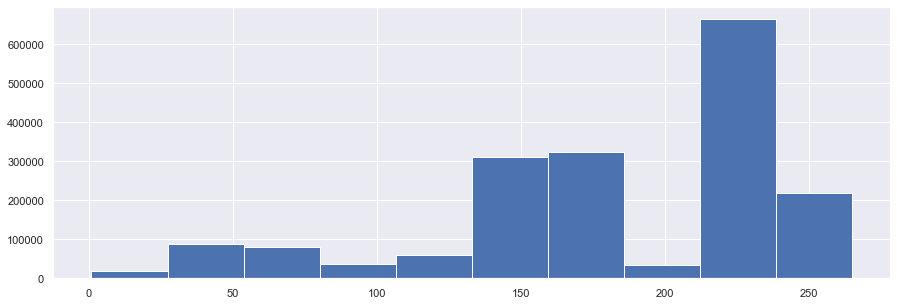

In [101]:
df_237['DOLocationID'].hist()

In [102]:
df_237['DOLocationID'].value_counts()

236    277568
237    191675
161     95001
162     93504
141     91814
        ...  
187         1
222         1
109         1
30          1
105         1
Name: DOLocationID, Length: 256, dtype: int64

Ciekawe, że ludzie jadą głównie do strefy `237`, może być to cenna informacja dla biznesu (ogólnie to mozna by zwizualizować na mapie, ale goni mnie czas...)

Tak tylko z ciekawości popatrzmy na `VendorID` (ale nic z tą informacją i tak nie zrobimy).

<AxesSubplot:>

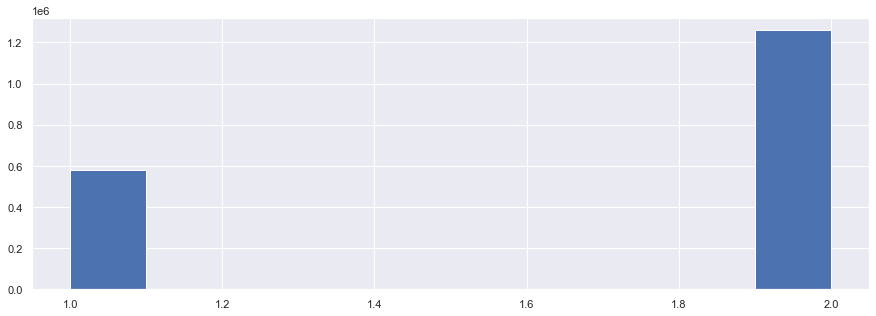

In [103]:
df_237['VendorID'].hist()

Jakie płątności dominują w naszej strefie.

In [107]:
df_237['payment_type'].hist()

<AxesSubplot:>

In [109]:
df_237['payment_type'].value_counts()

1.0    1404711
2.0     434061
5.0          1
Name: payment_type, dtype: int64

Zdecydowania wygrywają karty.

Jak wyglądają problemy z łącznością z serwerem.

<AxesSubplot:>

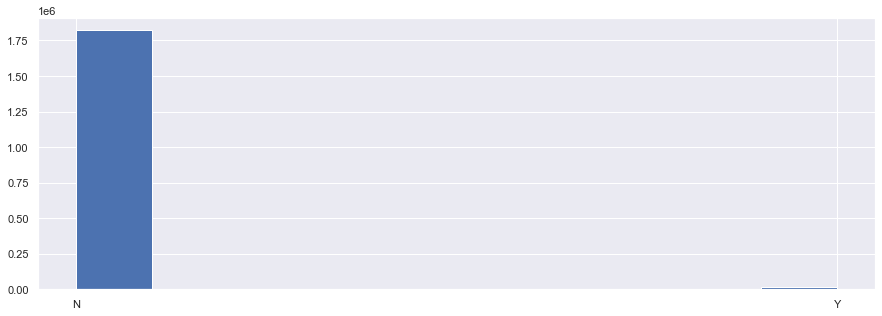

In [110]:
df_237['store_and_fwd_flag'].hist()

In [111]:
df_237['store_and_fwd_flag'].value_counts()

N    1820325
Y      18448
Name: store_and_fwd_flag, dtype: int64

Problemy wystepują tylko w okolicy 1%, nieźle.

Jak wygląda rozkład ostatnich taryf.

<AxesSubplot:>

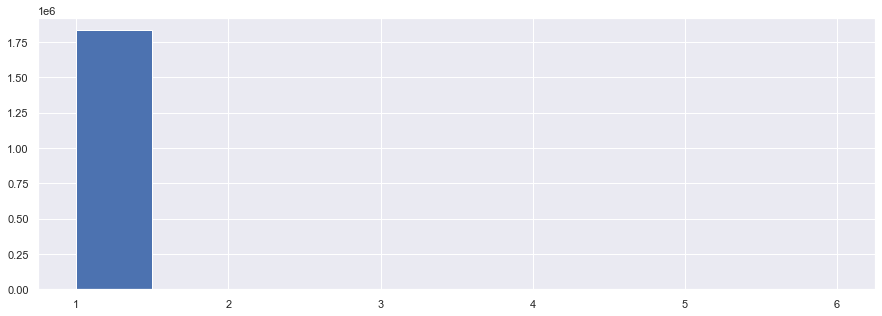

In [112]:
df_237['RatecodeID'].hist()

In [113]:
df_237['RatecodeID'].value_counts()

1.0    1832199
2.0       4820
3.0       1005
5.0        622
4.0        126
6.0          1
Name: RatecodeID, dtype: int64

Nic specjalnego, standardowa taryfa zdecydowanie dominuje.

Popatrzmy na rozkład całkowitej opłaty za przejazd.

<AxesSubplot:>

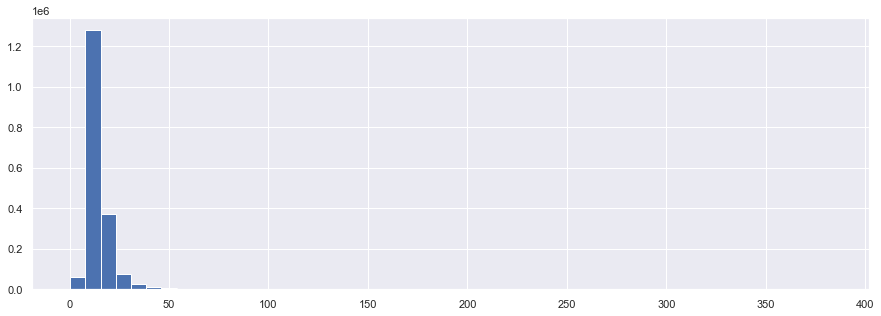

In [115]:
df_237['total_amount'].hist(bins=50)

Widać wyraźnie oultiery.

In [117]:
df_237['total_amount'].describe()

count    1.838773e+06
mean     1.450058e+01
std      7.278935e+00
min      3.100000e-01
25%      1.056000e+01
50%      1.280000e+01
75%      1.596000e+01
max      3.828000e+02
Name: total_amount, dtype: float64

In [119]:
df_237['total_amount'].quantile(.95)

25.8

In [120]:
df_237['total_amount'].quantile(.99)

43.5

Usuńmy wszystkie podróże z całkowitym kosztem powyżej 50.

In [121]:
df_237 = df_237[df_237['total_amount'] <= 50]

<AxesSubplot:>

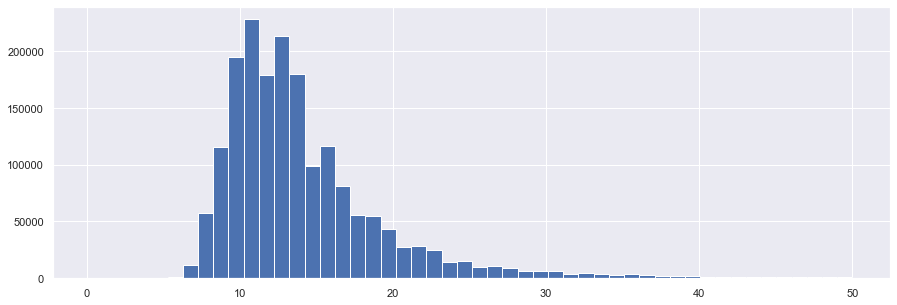

In [122]:
df_237['total_amount'].hist(bins=50)

Zdecydowanie lepiej, rozkład z asymetrią prawostronną, co ciekawe może bimodalny?

Popatrzmy na rozkład dystansu.

In [123]:
df_237['trip_distance'].hist(bins=50)

<AxesSubplot:>

Następne outliery.

In [124]:
df_237['trip_distance'].describe()

count    1.827023e+06
mean     1.688982e+00
std      1.625414e+00
min      1.000000e-02
25%      8.300000e-01
50%      1.290000e+00
75%      2.000000e+00
max      3.570000e+02
Name: trip_distance, dtype: float64

In [125]:
df_237['trip_distance'].quantile(.95)

4.1

In [126]:
df_237['trip_distance'].quantile(.99)

8.23

Usuńmy wszystkie podróże dłuższe niż 10.

In [127]:
df_237 = df_237[df_237['trip_distance'] <= 10]

In [128]:
df_237['trip_distance'].hist(bins=50)

<AxesSubplot:>

Znowu rozkład asymetryczny prawostronnie.

Popatrzmy na czasy podróży.

In [131]:
df_237['trip_duration'] = df_237['tpep_dropoff_datetime'] - df_237['tpep_pickup_datetime']

In [137]:
df_237['trip_duration'].describe()

count                      1821597
mean     0 days 00:12:13.334844644
std      0 days 00:57:39.259278392
min                0 days 00:00:01
25%                0 days 00:05:21
50%                0 days 00:08:11
75%                0 days 00:12:31
max                2 days 17:15:57
Name: trip_duration, dtype: object

In [138]:
df_237['trip_duration'].quantile(.95)

Timedelta('0 days 00:22:58')

In [139]:
df_237['trip_duration'].quantile(.99)

Timedelta('0 days 00:33:38')

<AxesSubplot:>

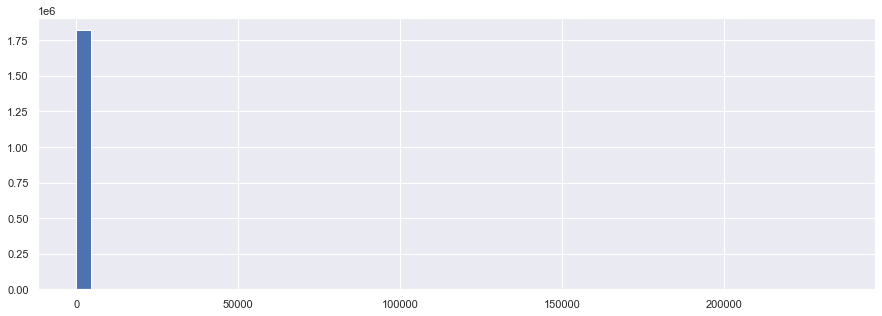

In [140]:
df_237['trip_duration'].astype('timedelta64[s]').hist(bins=50)

To już przed histogramem było wiadomo, że są outliery do usunięcia :) Usuniemy pdoróże dłuższe niż 40 minut.

In [147]:
df_237 = df_237[df_237['trip_duration'].astype('timedelta64[s]') <= 35*60]

<AxesSubplot:>

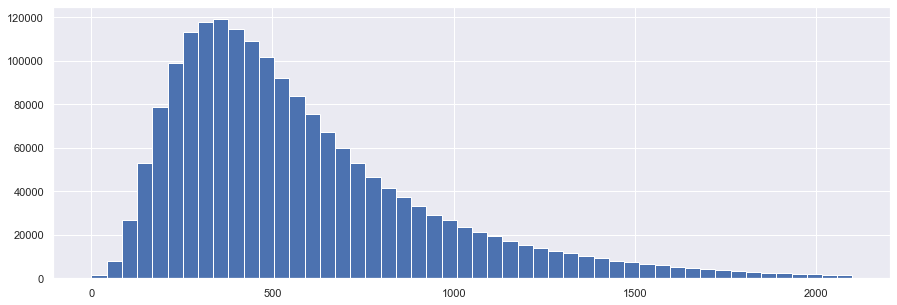

In [148]:
df_237['trip_duration'].astype('timedelta64[s]').hist(bins=50)

Ponownie rozkład asymetrzyny prawostronnie.

Popatrzmy na liczbę pasażerów.

<AxesSubplot:>

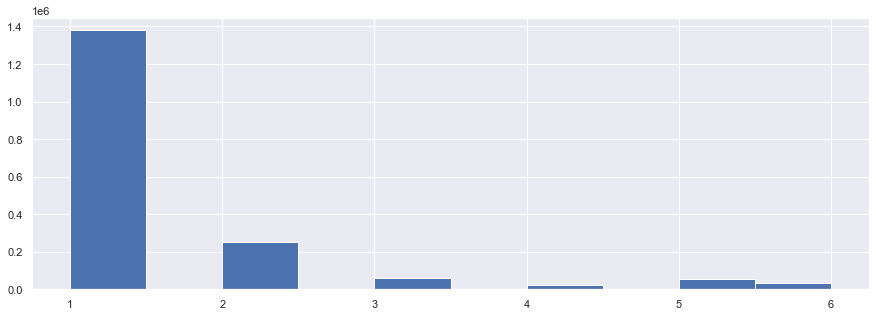

In [149]:
df_237['passenger_count'].hist()

In [151]:
df_237['passenger_count'].describe()

count    1.806409e+06
mean     1.460346e+00
std      1.057315e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

Można by dystkutować czy 6 osób wejdzie do taksówki ale 3 osoby, każda z dzieckiem na kolanach brzmią prawdopodobnie - nic nie ruszamy.

Popatrzymy na `fare_amount`.

<AxesSubplot:>

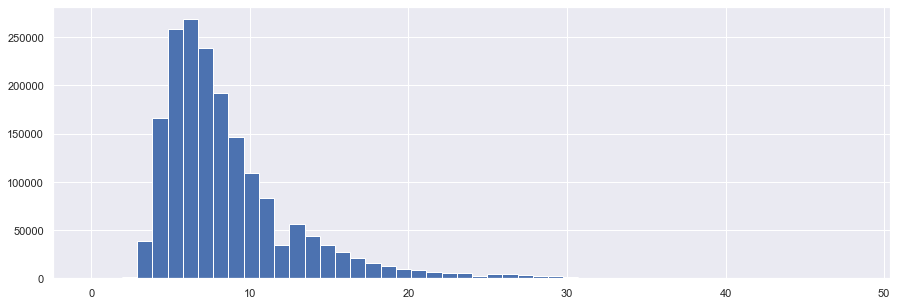

In [152]:
df_237['fare_amount'].hist(bins=50)

Ciekawy jest ten "dołek" - w sam raz do zbadania przez biznes.

Oczywiście są outliery w tym rozkłądzie asymetrycznym prawostronnie.

In [153]:
df_237['fare_amount'].describe()

count    1.806409e+06
mean     8.575273e+00
std      4.262883e+00
min      1.000000e-02
25%      5.500000e+00
50%      7.500000e+00
75%      1.000000e+01
max      4.800000e+01
Name: fare_amount, dtype: float64

In [154]:
df_237['fare_amount'].quantile(.95)

17.0

In [155]:
df_237['fare_amount'].quantile(.99)

25.0

Patrząc po histogramie dajemy odcięcie na 30.

In [156]:
df_237 = df_237[df_237['fare_amount'] <= 30]

<AxesSubplot:>

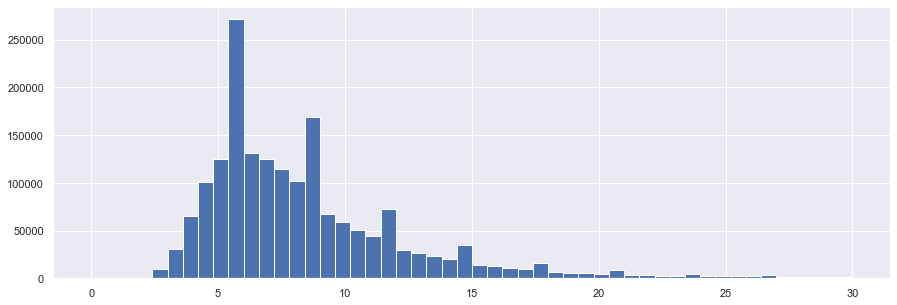

In [157]:
df_237['fare_amount'].hist(bins=50)

Teraz to wygląda jeszcze ciekawiej - analiza w połączeniu np. ze strefą docelową, liczbą pasażeró etc. mogłaby być interesująca.

Popatrzmy na dodatkowe opłaty.

<AxesSubplot:>

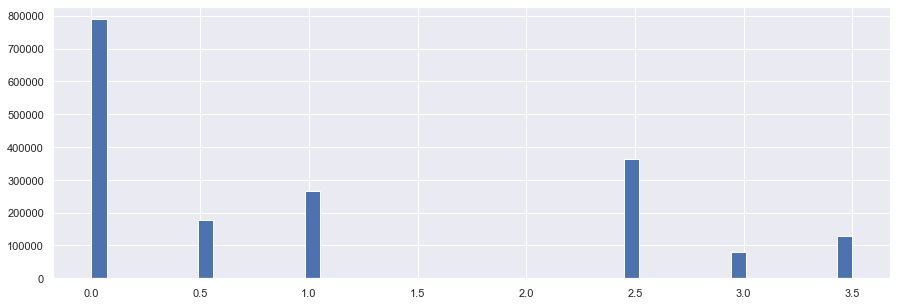

In [158]:
df_237['extra'].hist(bins=50)

In [159]:
df_237['extra'].describe()

count    1.804524e+06
mean     1.080762e+00
std      1.235359e+00
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e-01
75%      2.500000e+00
max      3.500000e+00
Name: extra, dtype: float64

Zostawiamy jak jest.

Spójrzmy na podatek MTA.

<AxesSubplot:>

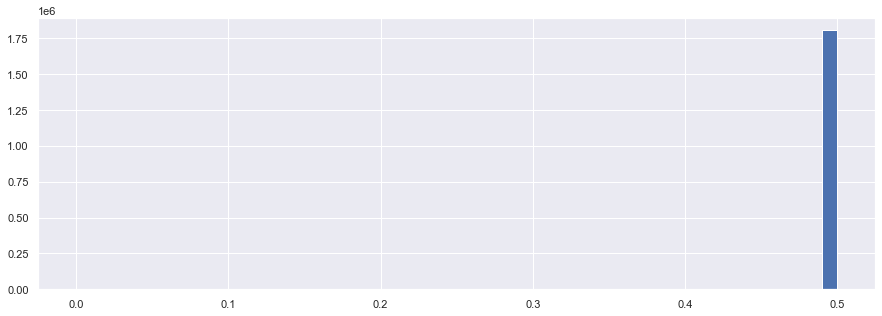

In [160]:
df_237['mta_tax'].hist(bins=50)

In [161]:
df_237['mta_tax'].describe()

count    1.804524e+06
mean     4.997785e-01
std      1.051939e-02
min      0.000000e+00
25%      5.000000e-01
50%      5.000000e-01
75%      5.000000e-01
max      5.000000e-01
Name: mta_tax, dtype: float64

In [162]:
df_237['mta_tax'].value_counts()

0.50    1803724
0.00        799
0.35          1
Name: mta_tax, dtype: int64

Usuńmy ten 0.35, bo zgodnie ze słownikiem podatek powinien być 0.5 albo wcale (właściwie trzeba było to zrobić dużo wcześniej).

In [163]:
df_237 = df_237[df_237['mta_tax'] != 30]

Popatrzmy na kwoty napiwków.

<AxesSubplot:>

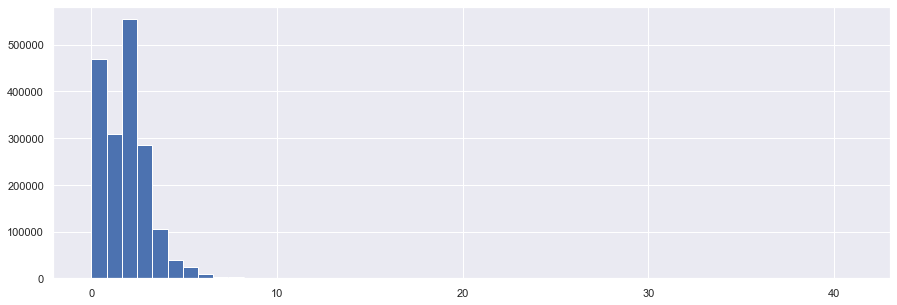

In [164]:
df_237['tip_amount'].hist(bins=50)

In [165]:
df_237['tip_amount'].describe()

count    1.804524e+06
mean     1.739123e+00
std      1.409291e+00
min      0.000000e+00
25%      1.000000e-01
50%      1.850000e+00
75%      2.460000e+00
max      4.100000e+01
Name: tip_amount, dtype: float64

In [166]:
df_237['tip_amount'].quantile(.95)

4.0

In [167]:
df_237['tip_amount'].quantile(.99)

5.82

In [168]:
df_237['tip_amount'].quantile(.999)

10.0

Usuńmy znudzonych milionerów, usuwając wartości powyzej 10

In [169]:
df_237 = df_237[df_237['tip_amount'] <= 10]

In [171]:
df_237['tip_amount'].hist(bins=50)

<AxesSubplot:>

Trochę jestem zaskoczony - dominuje kwota 0 (w USA? z drugiej strony wg słownika danych 'cash tips are not included' cofam moje zaskoczenie), pozostałe dane mogłyby zostać pomyslone z rozkładem normalnym, gdyby nie ten pik z lewej strony (to może być ciekawe dla biznesu).

Popatrzmy na opłaty drogowe.

<AxesSubplot:>

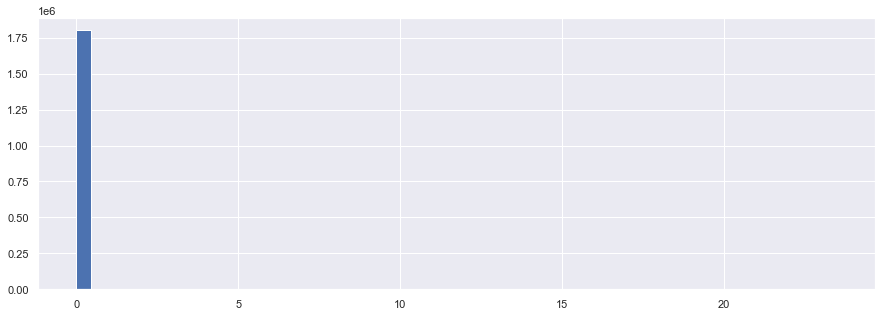

In [173]:
df_237['tolls_amount'].hist(bins=50)

In [174]:
df_237['tolls_amount'].describe()

count    1.803719e+06
mean     1.154671e-02
std      2.688217e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.350000e+01
Name: tolls_amount, dtype: float64

In [175]:
df_237['tolls_amount'].quantile(.99)

0.0

In [177]:
df_237['tolls_amount'].value_counts()

0.00     1800296
6.12        2440
6.55         793
2.50          44
2.80          37
3.00          22
0.01          19
2.00          10
5.00           9
1.00           9
11.75          8
12.24          4
13.75          4
0.25           2
6.13           2
1.50           2
2.29           2
4.00           2
0.80           1
23.50          1
7.80           1
16.30          1
6.64           1
13.10          1
0.50           1
5.76           1
5.80           1
6.76           1
9.50           1
2.22           1
14.30          1
7.00           1
Name: tolls_amount, dtype: int64

Zera nie możemy ustawić, bo to bez sensu, w sumie 23.50 opłaty też wyglądają prawdopodobnie - zostawiamy.

Obejrzyjmy dodatkową opłatę `improvement_surcharge`.

<AxesSubplot:>

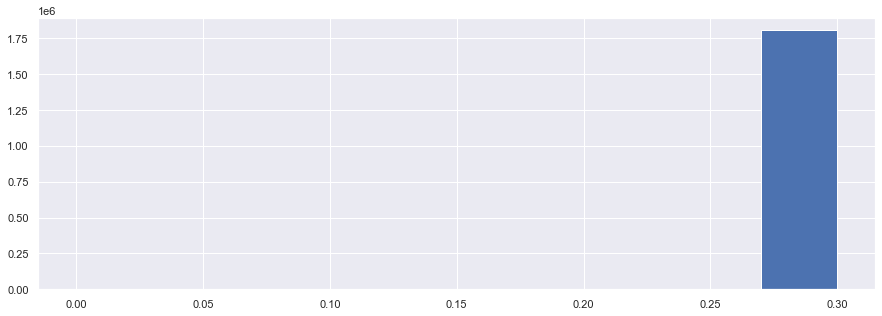

In [178]:
df_237['improvement_surcharge'].hist()

In [179]:
df_237['improvement_surcharge'].describe()

count    1.803719e+06
mean     2.999840e-01
std      2.188573e-03
min      0.000000e+00
25%      3.000000e-01
50%      3.000000e-01
75%      3.000000e-01
max      3.000000e-01
Name: improvement_surcharge, dtype: float64

In [180]:
df_237['improvement_surcharge'].value_counts()

0.3    1803623
0.0         96
Name: improvement_surcharge, dtype: int64

Wg słownika danych wszystko w porządku, zostawiamy.

Została nam już tylko tajemnicza `congestion_surcharge`

In [181]:
df_237['congestion_surcharge'].hist()

<AxesSubplot:>

In [183]:
df_237['congestion_surcharge'].value_counts()

2.50    1802135
0.00       1577
0.75          7
Name: congestion_surcharge, dtype: int64

Nie wiemy o niej za dużo, ale nie ma za bardzo do czego się przyczepić - nie mam wiedzy domenowej, żeby stwierdzić, że jest sens usuwać rekordy z 0.75.

Generalnie tutaj moglibyśmy zakończyć analizę z punktu widzenia modelowania szeregów czasowych (tzn. przejść do oglądania samych szeregów), ale można by wyciągnąć jeszcze masę ciekawych wnisoków np.:
* w jakich godzinach/dniach tygodnia są najdroższe kursy?
* czy sposób płatności zależy np. od pory dnia?
* kiedy jest najwięcej kursów z liczbą pasażerów powyżej 1 osoby?

Zostały mi jednak tylko 2 h, a ja nawet nie zdążyłem spróbować zamodelować przewidywania na pełnych danych, więc przechodzę prosto do naszych szeregów.

In [184]:
df_237.groupby([df_237['tpep_pickup_datetime'].dt.date])['PULocationID'].count().plot(linewidth=0.5)

<AxesSubplot:xlabel='tpep_pickup_datetime'>

Pięknie widać początek pandemii, ale tam dalej zaczyna się tworzyć jakiś trend. Czytając dokumentację Propheta zgaduję, że jeżeli chcemy otrzymać predykcje użyteczne chociaż w minimalnym stopniu powinniśmy odciąć dane:
* prawie na pewno pre-COVID
* być może te przed czerwcem 2020 (patrząc na wykres)
* w na przełomie 2020-2021

Spróbujemy zamodelować najpierw wszystkie dane, później będziemy kombinować (o ile starczy mi czasu).  

Popatrzmy na rozdzielczość godzinową.

<AxesSubplot:xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

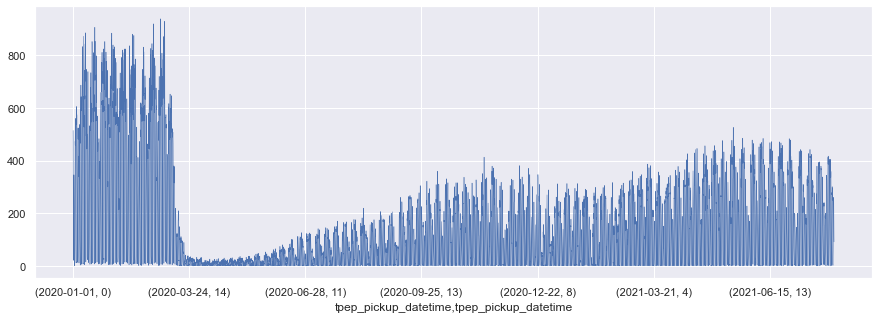

In [187]:
df_237.groupby([df_237['tpep_pickup_datetime'].dt.date, df_237['tpep_pickup_datetime'].dt.hour])['PULocationID'].\
count().plot(linewidth=0.5)

Też na pierwszy rzut oka w post-COVIDowej rzeczywistości nie wygląda najgorzej.

Skorzystamy z naszej wcześniejszej funkcji do rpzygotowania danych.

In [189]:
from typing import Tuple

In [190]:
def prepare_for_prophet(df: pd.DataFrame, cap_mult: float, floor: float) -> Tuple[pd.DataFrame, float]:
    df = df.groupby([df['tpep_pickup_datetime'].dt.date, df['tpep_pickup_datetime'].dt.hour]).count().unstack(fill_value=0).stack()
    df.index = df.index.rename(['date', 'hour'])
    df = df.reset_index()
    df['ds'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['hour'], unit='h')
    df = df[['ds', 'PULocationID']]
    df = df.rename(columns={'PULocationID': 'y'})
    cap = df['y'].max() * (1 + cap_mult)
    df['cap'] = cap  # we have to specify max cap to be able to set floor
    df['floor'] = floor  # can't have less than 0 journeys, so we need to specify floor
    return df, cap

In [191]:
floor = 1e-6

In [195]:
df_237, cap = prepare_for_prophet(df=df_237, cap_mult=0.1, floor=floor)

In [196]:
df_237.head()

ds    y     cap     floor
0 2020-01-01 00:00:00  514  1030.7  0.000001
1 2020-01-01 01:00:00  479  1030.7  0.000001
2 2020-01-01 02:00:00  207  1030.7  0.000001
3 2020-01-01 03:00:00   83  1030.7  0.000001
4 2020-01-01 04:00:00   30  1030.7  0.000001

In [197]:
df_237.tail()

ds    y     cap     floor
13101 2021-07-31 19:00:00  193  1030.7  0.000001
13102 2021-07-31 20:00:00  166  1030.7  0.000001
13103 2021-07-31 21:00:00  126  1030.7  0.000001
13104 2021-07-31 22:00:00  109  1030.7  0.000001
13105 2021-07-31 23:00:00   92  1030.7  0.000001

Dzielimy na zbiór treningowy i testowy - testowy to będzie ostatnie 7 dni.

In [212]:
split_date = '2021-07-25'
end_date = '2021-07-31'
train = df_237[df_237['ds'] < split_date]
test = df_237[df_237['ds'] >= split_date]

In [213]:
train.head()

ds    y     cap     floor
0 2020-01-01 00:00:00  514  1030.7  0.000001
1 2020-01-01 01:00:00  479  1030.7  0.000001
2 2020-01-01 02:00:00  207  1030.7  0.000001
3 2020-01-01 03:00:00   83  1030.7  0.000001
4 2020-01-01 04:00:00   30  1030.7  0.000001

In [214]:
train.tail()

ds    y     cap     floor
12934 2021-07-24 19:00:00  193  1030.7  0.000001
12935 2021-07-24 20:00:00  156  1030.7  0.000001
12936 2021-07-24 21:00:00  154  1030.7  0.000001
12937 2021-07-24 22:00:00  154  1030.7  0.000001
12938 2021-07-24 23:00:00   98  1030.7  0.000001

In [215]:
test.head()

ds   y     cap     floor
12939 2021-07-25 00:00:00  59  1030.7  0.000001
12940 2021-07-25 01:00:00  16  1030.7  0.000001
12941 2021-07-25 02:00:00  18  1030.7  0.000001
12942 2021-07-25 03:00:00   5  1030.7  0.000001
12943 2021-07-25 04:00:00   7  1030.7  0.000001

In [216]:
test.tail()

ds    y     cap     floor
13101 2021-07-31 19:00:00  193  1030.7  0.000001
13102 2021-07-31 20:00:00  166  1030.7  0.000001
13103 2021-07-31 21:00:00  126  1030.7  0.000001
13104 2021-07-31 22:00:00  109  1030.7  0.000001
13105 2021-07-31 23:00:00   92  1030.7  0.000001

In [236]:
test.shape

(167, 4)

Brakuje jednego rekordu w testowych wartościach, porpawiłem tam wyżej funkcję, powinna zadziałać, ale nie mam czasu testować.

Gdyby nasze dane były za duże moglibyśmy użyć combo Dask + Prophet https://examples.dask.org/applications/forecasting-with-prophet.html, ale tutaj raczej obejdzie się bez tego :)

In [217]:
from prophet import Prophet

In [218]:
m = Prophet(changepoint_prior_scale=0.01, growth='logistic')
m.add_country_holidays(country_name='US')

In [219]:
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Docs\sentione\dev\anaconda\envs\kinesso\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Hah, poniżej 2 minut :D

In [220]:
future = m.make_future_dataframe(periods=7*24, freq ='1h')
future['cap'] = cap
future['floor'] = floor

In [221]:
fcst = m.predict(future)

C:\Docs\sentione\dev\anaconda\envs\kinesso\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Docs\sentione\dev\anaconda\envs\kinesso\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


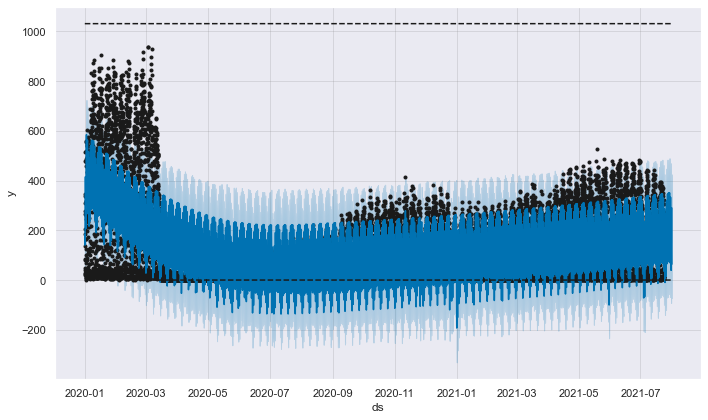

In [222]:
fig = m.plot(fcst)

Na pierwszy rzut oka trzeba będzie usuną pre-COVID, bo to nie ma sensu.

<AxesSubplot:xlabel='ds'>

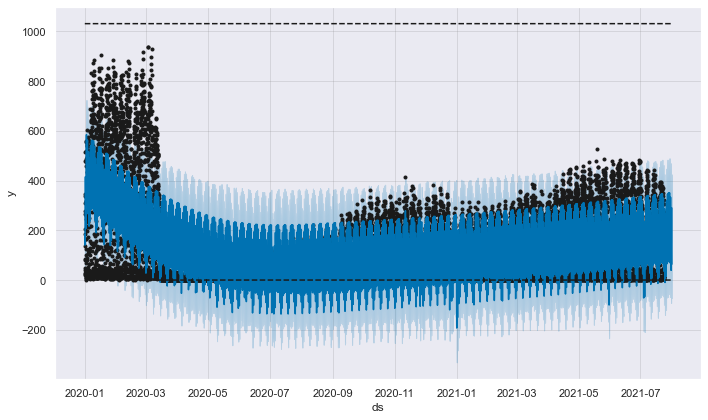

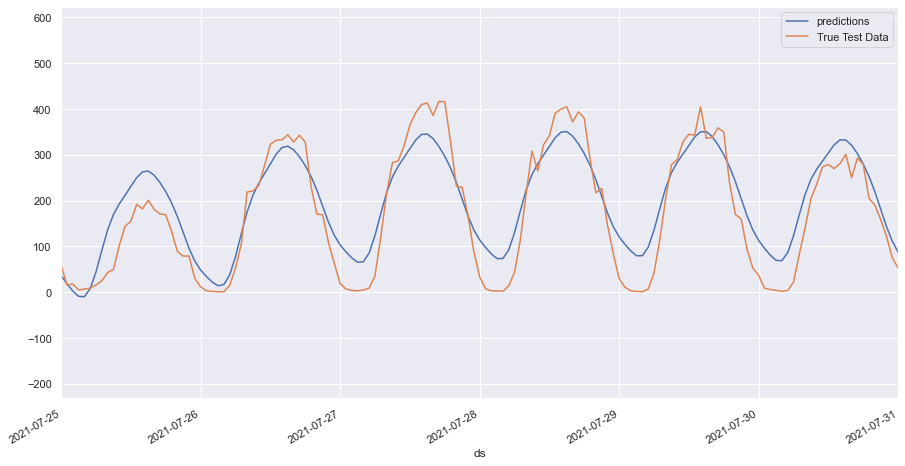

In [223]:
m.plot(fcst)
ax = fcst.plot(x='ds', y='yhat', legend=True, label='predictions', figsize=(15,8))
test.plot(x='ds', y='y', legend=True, label='True Test Data', ax=ax, xlim=(split_date, end_date))

Choziaż na pierwszy rzut oka przewidywane wartości są zaskakująco bliskie prawdy.

Wykonajmy ponownie sztuczkę z `floor`.

In [224]:
le_0_mask = fcst['yhat'].le(0)
fcst.loc[le_0_mask, 'yhat'] = floor

<AxesSubplot:xlabel='ds'>

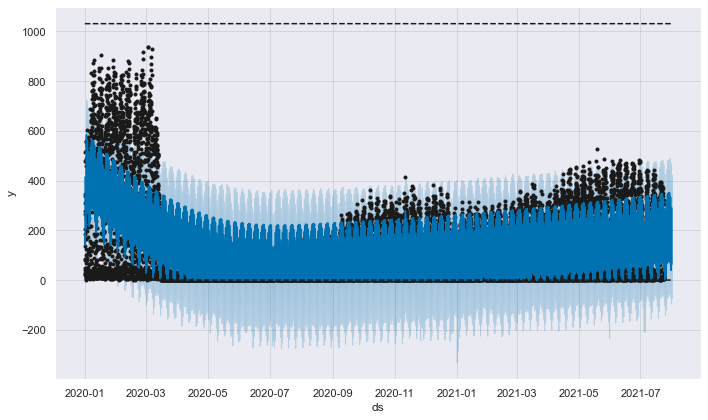

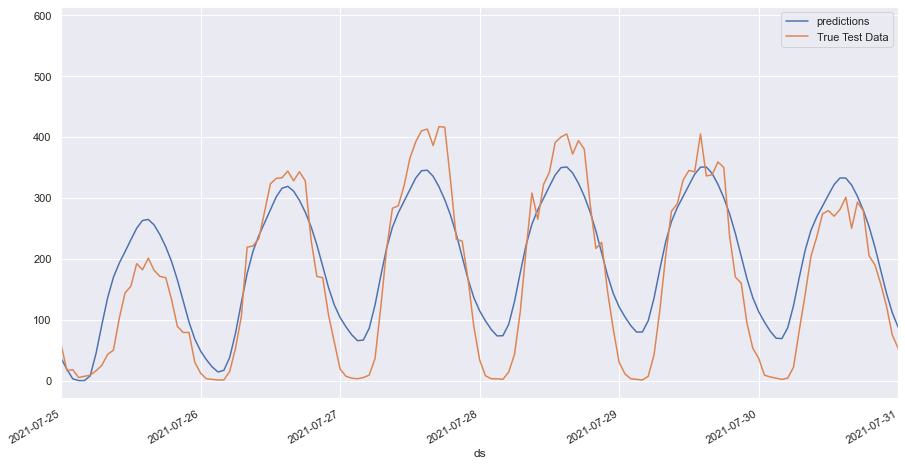

In [225]:
m.plot(fcst)
ax = fcst.plot(x='ds', y='yhat', legend=True, label='predictions', figsize=(15,8))
test.plot(x='ds', y='y', legend=True, label='True Test Data', ax=ax, xlim=(split_date, end_date))

Sprawdżmy MAPE.

In [227]:
from sklearn.metrics import mean_absolute_percentage_error

In [232]:
test

ds    y     cap     floor
12939 2021-07-25 00:00:00   59  1030.7  0.000001
12940 2021-07-25 01:00:00   16  1030.7  0.000001
12941 2021-07-25 02:00:00   18  1030.7  0.000001
12942 2021-07-25 03:00:00    5  1030.7  0.000001
12943 2021-07-25 04:00:00    7  1030.7  0.000001
...                   ...  ...     ...       ...
13101 2021-07-31 19:00:00  193  1030.7  0.000001
13102 2021-07-31 20:00:00  166  1030.7  0.000001
13103 2021-07-31 21:00:00  126  1030.7  0.000001
13104 2021-07-31 22:00:00  109  1030.7  0.000001
13105 2021-07-31 23:00:00   92  1030.7  0.000001

[167 rows x 4 columns]

In [228]:
mean_absolute_percentage_error(test['y'], fcst[fcst['ds'] >= split_date]['yhat'])

ValueError: Found input variables with inconsistent numbers of samples: [167, 168]

Brakujący rekord daje się we znaki sprawdżmy który to.

Namierzmy winowajcę.

In [260]:
foo = fcst[fcst['ds'] >= split_date]

In [264]:
foo[~foo['ds'].isin(test['ds'])]

ds       trend     cap     floor  yhat_lower  \
13038 2021-07-29 03:00:00  192.180258  1030.7  0.000001  -55.794163   

       yhat_upper  trend_lower  trend_upper  Christmas Day  \
13038  202.879328   192.180258   192.180258            0.0   

       Christmas Day_lower  ...  holidays  holidays_lower  holidays_upper  \
13038                  0.0  ...       0.0             0.0             0.0   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
13038  31.418981     31.418981     31.418981                   0.0   

       multiplicative_terms_lower  multiplicative_terms_upper       yhat  
13038                         0.0                         0.0  79.671757  

[1 rows x 69 columns]

Ustawmy go na `0`.

In [275]:
test.loc[-1] = [datetime(2021, 7, 29, 3), 0, 1030.7, 1e-6]

<ipython-input-275-542514b64b55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[-1] = [datetime(2021, 7, 29, 3), 0, 1030.7, 1e-6]


In [276]:
test.tail()

ds    y     cap     floor
 13102 2021-07-31 20:00:00  166  1030.7  0.000001
 13103 2021-07-31 21:00:00  126  1030.7  0.000001
 13104 2021-07-31 22:00:00  109  1030.7  0.000001
 13105 2021-07-31 23:00:00   92  1030.7  0.000001
-1     2021-07-29 03:00:00    0  1030.7  0.000001

In [278]:
test = test.sort_values(by=['ds'])

In [280]:
test.tail()

ds    y     cap     floor
13101 2021-07-31 19:00:00  193  1030.7  0.000001
13102 2021-07-31 20:00:00  166  1030.7  0.000001
13103 2021-07-31 21:00:00  126  1030.7  0.000001
13104 2021-07-31 22:00:00  109  1030.7  0.000001
13105 2021-07-31 23:00:00   92  1030.7  0.000001

In [281]:
fcst[fcst['ds'] >= split_date].tail()

ds       trend     cap     floor  yhat_lower  \
13102 2021-07-31 19:00:00  193.599055  1030.7  0.000001   78.288570   
13103 2021-07-31 20:00:00  193.621287  1030.7  0.000001   39.341253   
13104 2021-07-31 21:00:00  193.643522  1030.7  0.000001   -4.048756   
13105 2021-07-31 22:00:00  193.665758  1030.7  0.000001  -35.096309   
13106 2021-07-31 23:00:00  193.687997  1030.7  0.000001  -72.001571   

       yhat_upper  trend_lower  trend_upper  Christmas Day  \
13102  347.455614   193.554564   193.711802            0.0   
13103  304.805054   193.576302   193.735319            0.0   
13104  267.463935   193.596146   193.758837            0.0   
13105  233.998235   193.616621   193.782359            0.0   
13106  187.720593   193.637488   193.805882            0.0   

       Christmas Day_lower  ...  holidays  holidays_lower  holidays_upper  \
13102                  0.0  ...       0.0             0.0             0.0   
13103                  0.0  ...       0.0             0.0             0.0   
13104                  0.0  ...       0.0             0.0             0.0   
13105                  0.0  ...       0.0             0.0             0.0   
13106                  0.0  ...       0.0             0.0             0.0   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
13102 -42.349611    -42.349611    -42.349611                   0.0   
13103 -44.302670    -44.302670    -44.302670                   0.0   
13104 -46.174439    -46.174439    -46.174439                   0.0   
13105 -47.953703    -47.953703    -47.953703                   0.0   
13106 -49.629447    -49.629447    -49.629447                   0.0   

       multiplicative_terms_lower  multiplicative_terms_upper        yhat  
13102                         0.0                         0.0  206.377553  
13103                         0.0                         0.0  172.577601  
13104                         0.0                         0.0  133.977677  
13105                         0.0                         0.0   95.747105  
13106                         0.0                         0.0   63.809651  

[5 rows x 69 columns]

In [279]:
mean_absolute_percentage_error(test['y'], fcst[fcst['ds'] >= split_date]['yhat'])

2135772003346956.5

Nie ma sensu nawet tego komentować - spróbujmy obciąć `train` przed czerwcem 2020

In [285]:
train = train[train['ds'] >= '2020-06-01']

In [288]:
m = Prophet(changepoint_prior_scale=0.01, growth='logistic')
m.add_country_holidays(country_name='US')

In [289]:
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Docs\sentione\dev\anaconda\envs\kinesso\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [290]:
future = m.make_future_dataframe(periods=7*24, freq ='1h')
future['cap'] = cap
future['floor'] = floor

In [291]:
fcst = m.predict(future)

C:\Docs\sentione\dev\anaconda\envs\kinesso\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Docs\sentione\dev\anaconda\envs\kinesso\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


<AxesSubplot:xlabel='ds'>

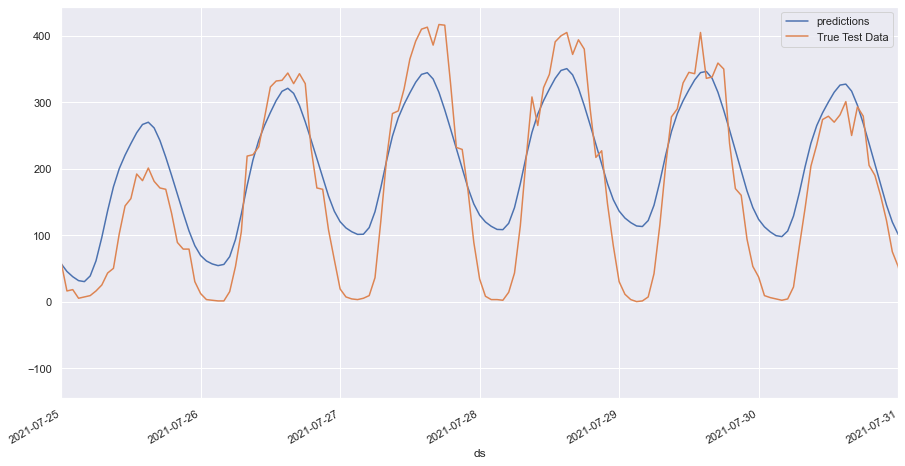

In [292]:
m.plot(fcst)
ax = fcst.plot(x='ds', y='yhat', legend=True, label='predictions', figsize=(15,8))
test.plot(x='ds', y='y', legend=True, label='True Test Data', ax=ax, xlim=(split_date, end_date))

Mocno przeszacowujemy w dołkach.

In [293]:
mean_absolute_percentage_error(test['y'], fcst[fcst['ds'] >= split_date]['yhat'])

3050626889966238.0

Z ciekawości spróbujmy jeszcze wziąc dane doperio od marca 2021.

In [294]:
train = train[train['ds'] >= '2021-03-01']

In [295]:
m = Prophet(changepoint_prior_scale=0.01, growth='logistic')
m.add_country_holidays(country_name='US')

In [296]:
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Docs\sentione\dev\anaconda\envs\kinesso\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [297]:
future = m.make_future_dataframe(periods=7*24, freq ='1h')
future['cap'] = cap
future['floor'] = floor

In [298]:
fcst = m.predict(future)

C:\Docs\sentione\dev\anaconda\envs\kinesso\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Docs\sentione\dev\anaconda\envs\kinesso\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


<AxesSubplot:xlabel='ds'>

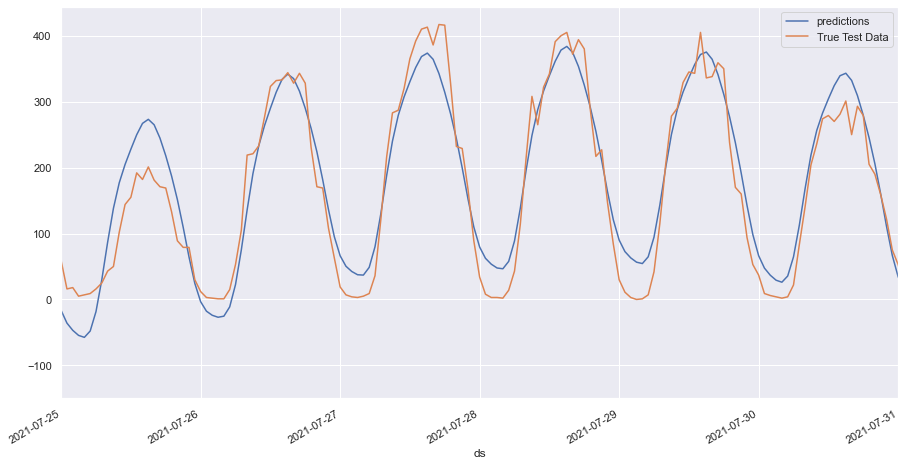

In [300]:
m.plot(fcst)
ax = fcst.plot(x='ds', y='yhat', legend=True, label='predictions', figsize=(15,8))
test.plot(x='ds', y='y', legend=True, label='True Test Data', ax=ax, xlim=(split_date, end_date))

To wygląda mniej tragicznie, sprobujmy sztuczki z `floor`.

In [301]:
le_0_mask = fcst['yhat'].le(0)
fcst.loc[le_0_mask, 'yhat'] = floor

<AxesSubplot:xlabel='ds'>

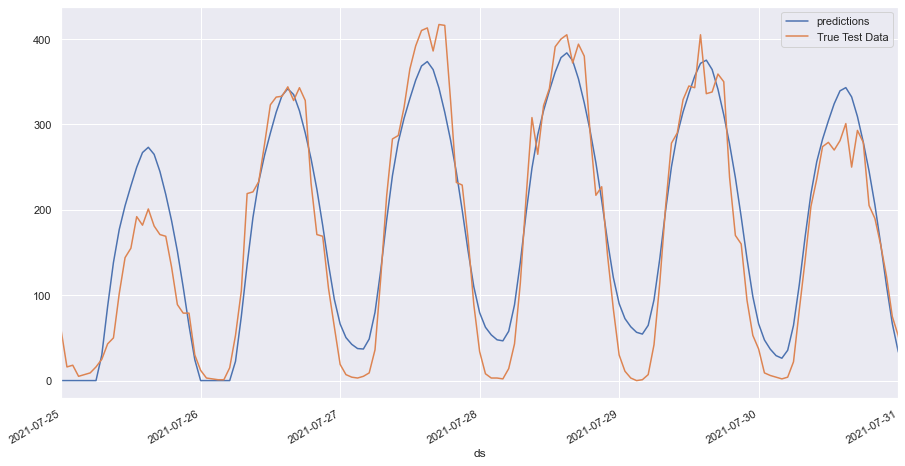

In [302]:
m.plot(fcst)
ax = fcst.plot(x='ds', y='yhat', legend=True, label='predictions', figsize=(15,8))
test.plot(x='ds', y='y', legend=True, label='True Test Data', ax=ax, xlim=(split_date, end_date))

I MAPE.

In [303]:
mean_absolute_percentage_error(test['y'], fcst[fcst['ds'] >= split_date]['yhat'])

1515728505592369.0

Tutaj przyznam, ze przez moje kombinowanie ze zbiorem testowym (źle zrobiłem `groupby` przez co nie było rekordów z `0`), być może otrzymuję kompletne bzdury, natomiast graficznie nie wygląda to az tak tragicznie - być może coś z tego założenia, żeby podejść do problemu od strony szeregów czasowych ma sens.

Może dodanie doatkowych regresorów (może nawet stan stref woół obecnej strefy?) mogłoby pomóc (poza próbą zabawy hiperparametrami i usuwaniem oultierów z szeregu) https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors

Pytanie czy to podejście byłoby w ogóle skalowalne dla klienta - przewidujemy tutaj popyt dla jednej strefy, a "żółtych" mamy 263. 263 modele do wytrenowania i utrzymania? Nawet jeżeli ograniczyć by je do najpopularniejszych stref, to dalej może być dużo. Co prawda trening jednego modelu przebiega dosyć szybko (kilka minut), ale i tak jak na razie człowiek musiałby brać udział w jego trenowaniu.

Być może lepszym podejściem byłoby przeformułowanie modelu na "zwykłą" regresję z wielokrotnym outputem - może jakaś seic neuronowa dałaby tutaj radę?

Oczywiście moje rozważania w tych 2 notebookach mogą być też kompletnie błędne :)

Zadanie było ciekawe, mimo tego, że czuję się pokonany przez `Dask`a, to już widzę zastosowanie `Prophet`a do przewidywania ilości konwersji w kampaniach PPC z dodatkowym regresorem w postaci dziennego budżetu, także zdecydowanie nie był to zmarnowany czas :) (około 3 wieczory)

Analizę sponsoruje https://open.spotify.com/album/6ApvW9zTP1h6Ez7fabS2OW?si=2E6R2kWlSoGhGC8G8qSCKQ

Czas kończyć zabawę, bo zaraz północ, a ja jeszcze muszę utowrzyć na to wszystko repo :)